# CS345 Project – Student Performance Predictions

**Team Members:**  
- Hind Alshahrani  
- Chase Bishop  

**Dataset:** Student Performance Predictions  
https://www.kaggle.com/datasets/haseebindata/student-performance-predictions


##  Goal

The goal of this project is to predict the final grade of students using machine learning regression models. We will:
- Clean and preprocess the dataset  
- Perform Exploratory Data Analysis (EDA)  
- Train and compare regression models  
- Tune hyperparameters  
- Detect overfitting and underfitting  
- Identify the most important features  

##  Methods

We follow these steps:

1. **Data Cleaning & Preprocessing**
   - Impute missing values  
   - Encode categorical features  
   - Normalize numerical features  
   - Train-test split  

2. **Exploratory Data Analysis**
   - Summary statistics  
   - Correlation heatmap  
   - Visualizations of key relationships  

3. **Modeling**
   - Linear Regression  
   - Ridge Regression  
   - Lasso Regression  
   - Decision Tree Regressor  
   - Random Forest Regressor  

4. **Evaluation**
   - MSE, RMSE, MAE, R²  

5. **Hyperparameter Tuning**
   - Grid Search / Random Search  

6. **Model Diagnostics**
   - Learning curves  
   - Residual analysis  

7. **Feature Importance**


# **1. Data Cleaning & Preprocessing**

In [1]:
import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as pyplt_
import seaborn as snb_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

studPerf_Data = pnd.read_csv("../data/student_performance_updated_1000.csv")
studPerf_Data = studPerf_Data.dropna(subset=["FinalGrade"])
studPerf_Data = studPerf_Data.drop(columns=["StudentID", "Name"], errors="ignore")
studPerf_Data["Study Hours"] = studPerf_Data["Study Hours"].clip(lower=0)
studPerf_Data["Attendance (%)"] = studPerf_Data["Attendance (%)"].clip(0, 100)
dataCols_ = [
    "AttendanceRate",
    "StudyHoursPerWeek",
    "PreviousGrade",
    "ExtracurricularActivities",
    "Study Hours",
    "Attendance (%)"
]

catCols = [
    "Gender",
    "ParentalSupport",
    "Online Classes Taken"
]

targetCol = "FinalGrade"


numTrans_ = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

catTrans_ = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

prep_ = ColumnTransformer(
    transformers=[
        ("num", numTrans_, dataCols_),
        ("cat", catTrans_, catCols)
    ]
)

# Train-Test Split
X = studPerf_Data.drop(columns=[targetCol])
y = studPerf_Data[targetCol]

StudPerfDB_TrainX, StudPerfDB_TestX, StudPerfDB_ytrain, StudPerfDB_ytest = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Dataset Shape: {studPerf_Data.shape}")
print(f"\nColumns: {studPerf_Data.columns.tolist()}")
print(f"\nData Types:\n{studPerf_Data.dtypes}")
print(f"\nMissing Values:\n{studPerf_Data.isnull().sum()}")
print(f"\nTotal Missing Values: {studPerf_Data.isnull().sum().sum()}")
print(f"\nDuplicate Rows: {studPerf_Data.duplicated().sum()}")

# Display first few rows
print("\nFirst 5 rows:")
print(studPerf_Data.head())


Dataset Shape: (960, 10)

Columns: ['Gender', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport', 'FinalGrade', 'Study Hours', 'Attendance (%)', 'Online Classes Taken']

Data Types:
Gender                        object
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport               object
FinalGrade                   float64
Study Hours                  float64
Attendance (%)               float64
Online Classes Taken          object
dtype: object

Missing Values:
Gender                       47
AttendanceRate               37
StudyHoursPerWeek            47
PreviousGrade                31
ExtracurricularActivities    41
ParentalSupport              22
FinalGrade                    0
Study Hours                  22
Attendance (%)               40
Online Classes Taken         23
dtype: int64

Total Missing Values: 310

Dupl

# **2. Exploratory Data Analysis (EDA)**

       AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count      923.000000         913.000000     929.000000   
mean        85.503792          17.626506      77.609257   
std          7.297872           6.257946       9.976760   
min         70.000000           8.000000      60.000000   
25%         82.000000          12.000000      70.000000   
50%         88.000000          18.000000      78.000000   
75%         91.000000          22.000000      86.000000   
max         95.000000          30.000000      90.000000   

       ExtracurricularActivities  FinalGrade  Study Hours  Attendance (%)  
count                 919.000000  960.000000   938.000000      920.000000  
mean                    1.516866   80.030208     2.450853       76.246739  
std                     1.049685    9.493652     1.459311       14.878653  
min                     0.000000   62.000000     0.000000       50.000000  
25%                     1.000000   72.000000     1.125000       63.000000  
50%         

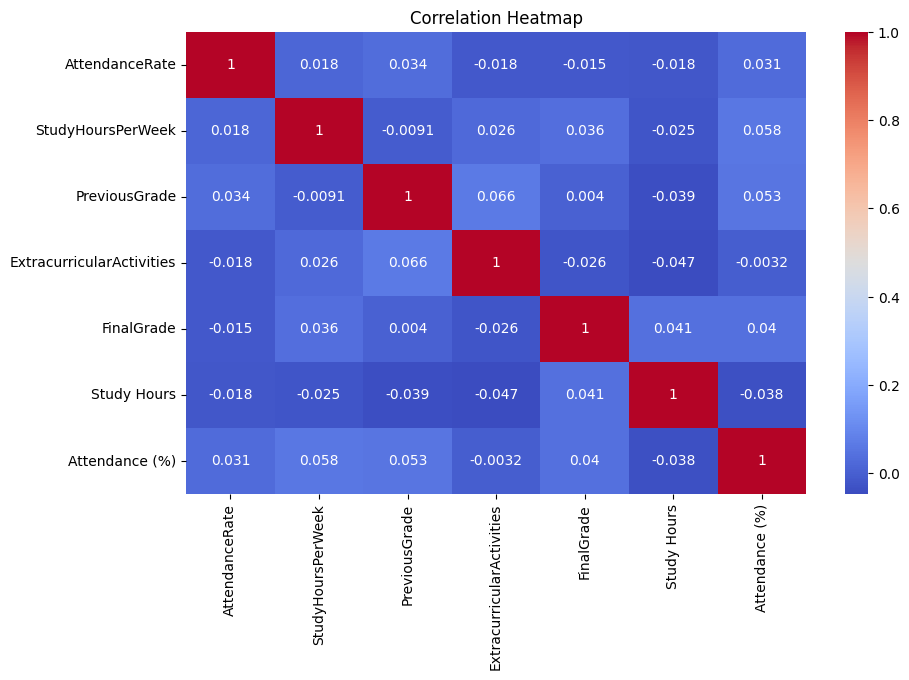

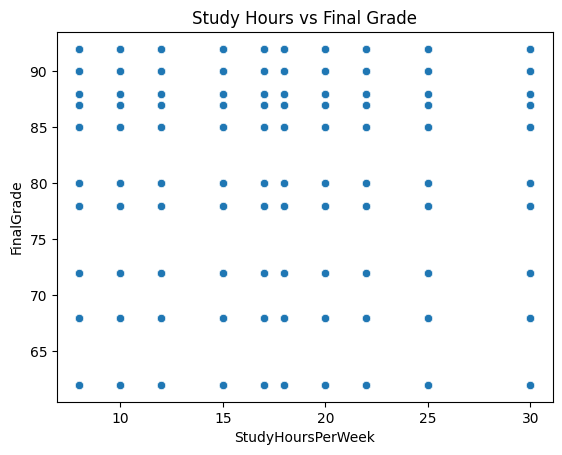

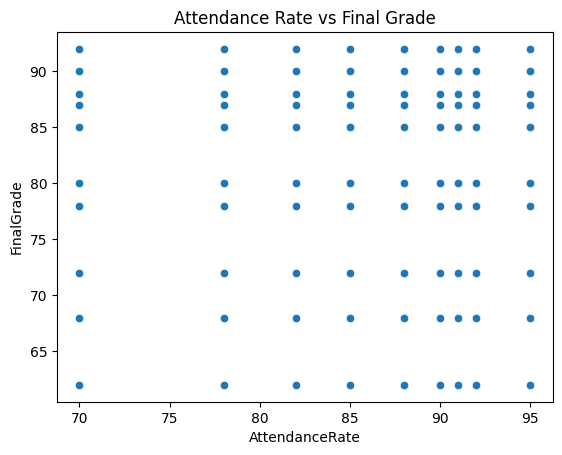

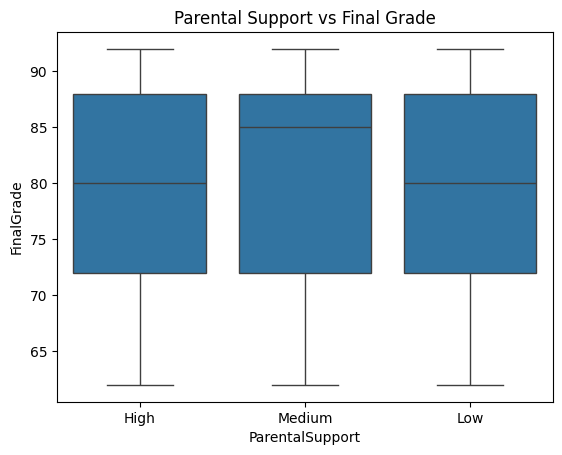

In [3]:
# Statistics
print(studPerf_Data.describe())
print(studPerf_Data.info())

# Correlation
pyplt_.figure(figsize=(10, 6))
snb_.heatmap(studPerf_Data.corr(numeric_only=True), annot=True, cmap="coolwarm")
pyplt_.title("Correlation Heatmap")
pyplt_.show()

#Visualizations
snb_.scatterplot(data=studPerf_Data, x="StudyHoursPerWeek", y="FinalGrade")
pyplt_.title("Study Hours vs Final Grade")
pyplt_.show()

snb_.scatterplot(data=studPerf_Data, x="AttendanceRate", y="FinalGrade")
pyplt_.title("Attendance Rate vs Final Grade")
pyplt_.show()

snb_.boxplot(data=studPerf_Data, x="ParentalSupport", y="FinalGrade")
pyplt_.title("Parental Support vs Final Grade")
pyplt_.show()

# **3. Modeling**

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create models
MLModels_All = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Fit models with preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

setAll_ML_Model_List = {}

for n, m in MLModels_All.items():
    setP = Pipeline(steps=[
        ("preprocess", prep_),
        ("model", m)
    ])

    setP.fit(StudPerfDB_TrainX, StudPerfDB_ytrain)
    StudPerfDB_Ypred = setP.predict(StudPerfDB_TestX)

    setAll_ML_Model_List[n] = {
        "MSE": mean_squared_error(StudPerfDB_ytest, StudPerfDB_Ypred),
        "RMSE": nmp.sqrt(mean_squared_error(StudPerfDB_ytest, StudPerfDB_Ypred)),
        "MAE": mean_absolute_error(StudPerfDB_ytest, StudPerfDB_Ypred),
        "R2": r2_score(StudPerfDB_ytest, StudPerfDB_Ypred)
    }

# **4. Evaluation**

In [21]:
eval_studPerf_Data = pnd.DataFrame(setAll_ML_Model_List).T
print(eval_studPerf_Data)

                          MSE       RMSE       MAE        R2
Linear Regression   89.724409   9.472297  7.984104 -0.018077
Ridge Regression    89.716405   9.471874  7.983598 -0.017986
Lasso Regression    88.176866   9.390254  7.883247 -0.000517
Decision Tree      155.328125  12.463070  9.859375 -0.762463
Random Forest       91.187245   9.549201  8.060573 -0.034675


# **5. Hyperparameter Tuning**

In [6]:
# Random Forest Grid Search
from sklearn.model_selection import GridSearchCV

randForestPara_ = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5, 10]
}

RandForestGrid_ = Pipeline(steps=[
    ("preprocess", prep_),
    ("model", RandomForestRegressor(random_state=42))
])

RandForestGrid_Search = GridSearchCV(
    RandForestGrid_, randForestPara_, cv=3, scoring="r2", n_jobs=-1
)

RandForestGrid_Search.fit(StudPerfDB_TrainX, StudPerfDB_ytrain)

print("Best Parameters:", RandForestGrid_Search.best_params_)
print("Best Score:", RandForestGrid_Search.best_score_)


Best Parameters: {'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best Score: -0.008275669875452474


# **6. Model Diagnostics**

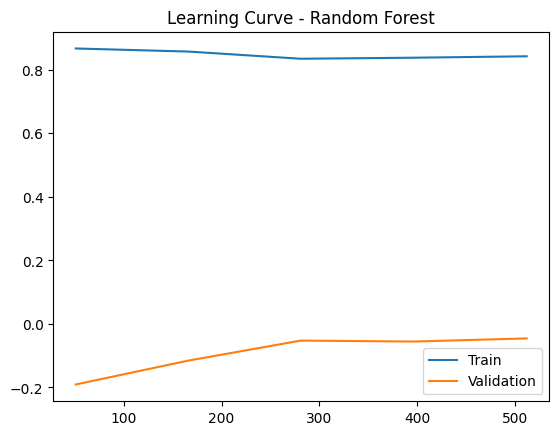

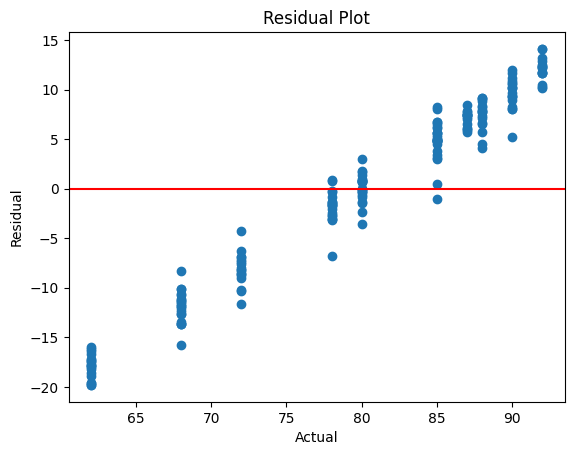

In [7]:
# Learning Curve
from sklearn.model_selection import learning_curve

getTrainSize, getTrainScores, getTestScores = learning_curve(
    RandomForestRegressor(random_state=42),
    prep_.fit_transform(StudPerfDB_TrainX), StudPerfDB_ytrain,
    cv=3, scoring='r2'
)

pyplt_.plot(getTrainSize, getTrainScores.mean(axis=1), label="Train")
pyplt_.plot(getTrainSize, getTestScores.mean(axis=1), label="Validation")
pyplt_.legend()
pyplt_.title("Learning Curve - Random Forest")
pyplt_.show()
# Residual Plot
getBestModel = RandForestGrid_Search.best_estimator_
StudPerfDB_Ypred = getBestModel.predict(StudPerfDB_TestX)

pyplt_.scatter(StudPerfDB_ytest, StudPerfDB_ytest - StudPerfDB_Ypred)
pyplt_.axhline(0, color='red')
pyplt_.xlabel("Actual")
pyplt_.ylabel("Residual")
pyplt_.title("Residual Plot")
pyplt_.show()

# **7. Feature Importance**

In [8]:
RandomForest_Reg = RandomForestRegressor(random_state=42)
RandomForest_Reg.fit(prep_.fit_transform(StudPerfDB_TrainX), StudPerfDB_ytrain)

GetImp = RandomForest_Reg.feature_importances_
encoded_cols = prep_.named_transformers_['cat']['encoder'].get_feature_names_out(catCols)
all_cols = nmp.concatenate([dataCols_, encoded_cols])

GetImpFeat_ = pnd.DataFrame({
    "Feature": all_cols,
    "Importance": GetImp
}).sort_values(by="Importance", ascending=False)

print(GetImpFeat_)

                       Feature  Importance
4                  Study Hours    0.209323
5               Attendance (%)    0.204457
2                PreviousGrade    0.129518
1            StudyHoursPerWeek    0.123495
0               AttendanceRate    0.116864
3    ExtracurricularActivities    0.081501
8         ParentalSupport_High    0.024397
10      ParentalSupport_Medium    0.021373
11  Online Classes Taken_False    0.018726
9          ParentalSupport_Low    0.018533
6                Gender_Female    0.018301
12   Online Classes Taken_True    0.017451
7                  Gender_Male    0.016062


#**Summary & Findings**

#Best Model

The best overall performance was observed with the Tuned Random Forest Regressor in relation to the other models because the model provided more reliable outcome in the final grades of the students.

#Important Features

The strongest predictors of the final grades were:


*   Study Hours
*   Attendance
*   Previous Grade
#Model Behaviors:

The learning curve shows that there is slight overfitting, and the residual plot indicates that the errors in prediction are not large, and they are normally distributed around the value 0, implying that the model is reasonably reliable.

#Conclusion

The patterns in the student performance can be well modeled using machine learning, but it is not accurate because of the quality of data and variability. The model performance can be further improved by improving feature engineering and data consistency.